In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('employee_dataset.csv')

# Data Explanation
print("Data Exploration:")
print(df.info())
print("\n\nSample Data:")
print(df.head())
print("\n\nNull values in columns:")
print(df.isnull().sum())

Data Exploration:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB
None


Sample Data:
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185

In [2]:
# Changing the values of Height column (between 150 and 180)
df['Height']=np.random.randint(150,181,size=len(df))
print(df['Height'].head())
print(df['Height'].tail())

0    162
1    176
2    166
3    170
4    169
Name: Height, dtype: int32
453    150
454    152
455    157
456    175
457    160
Name: Height, dtype: int32


In [3]:
# Task1 : Distribution of Employees Across Teams
team_counts = df["Team"].value_counts()
total_employees = team_counts.sum()
team_percentages = (team_counts / total_employees) * 100
print("\nTask 1: Distribution of Employees Across Teams:")
print(team_counts)
print(team_percentages)


Task 1: Distribution of Employees Across Teams:
Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64
Team
New Orleans Pelicans      4.148472
Memphis Gr

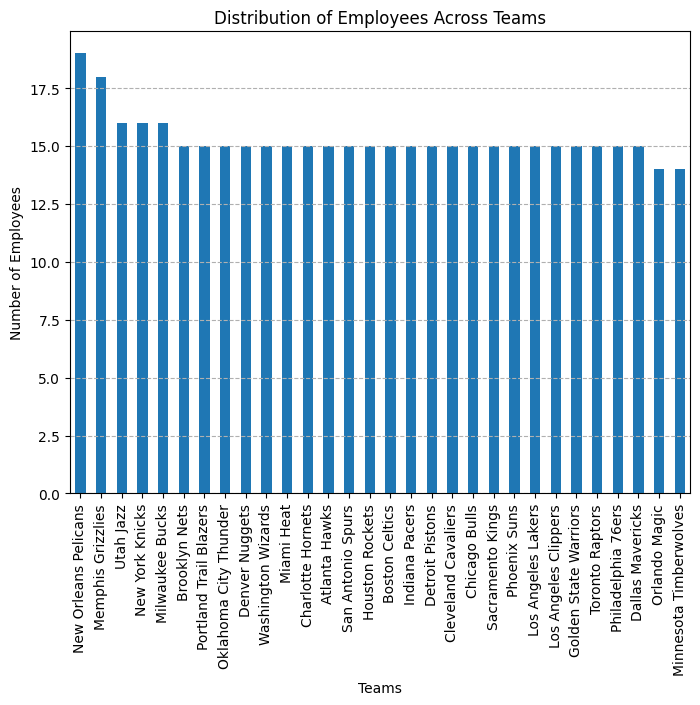

In [15]:
# Create a bar plot to visualise the Distribution of Employees Across Teams
team_counts.plot(kind="bar",figsize=(8,6))
plt.xlabel("Teams")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employees Across Teams")
plt.grid(axis="y", linestyle="--")
plt.show()

In [5]:
# Task2 : Employee Segregation by Position
position_counts = df["Position"].value_counts()
print("\nTask 2: Employee Segragation by Position:")
print(position_counts)


Task 2: Employee Segragation by Position:
Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


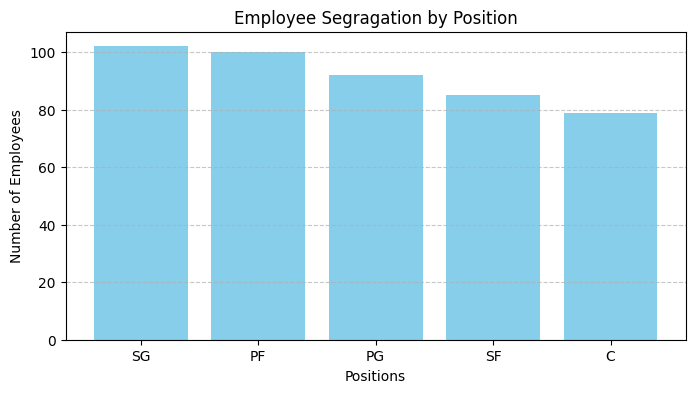

In [6]:
# Create a bar plot to visualise the Employee Segragation by Position
plt.figure(figsize=(8, 4))
plt.bar(position_counts.index, position_counts, color="skyblue")
plt.xlabel("Positions")
plt.ylabel("Number of Employees")
plt.title("Employee Segragation by Position")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [7]:
# Task3 : Predominant Age Group Amaong Employees
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ["20-30", "30-40", "40-50", "50-60", "60-70"]
df["Age Group"] = pd.cut(df["Age"], bins = age_bins, labels = age_labels)
age_group_counts = df["Age Group"].value_counts()
print("\nTask 3: Predominant Age Group Amaong Employees:")
print(age_group_counts)


Task 3: Predominant Age Group Amaong Employees:
Age Group
20-30    346
30-40     91
40-50      0
50-60      0
60-70      0
Name: count, dtype: int64


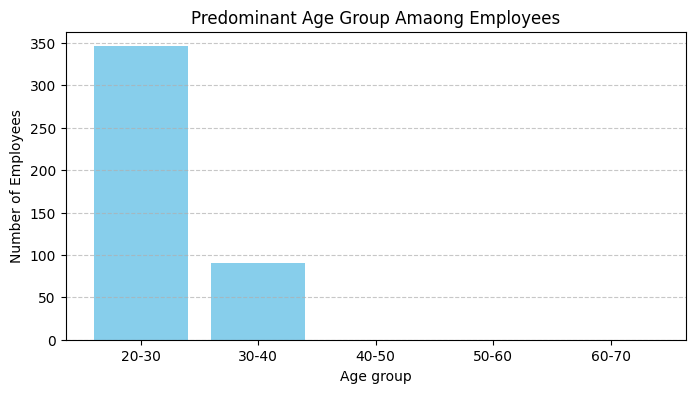

In [8]:
# Create a bar plot to visualise the Predominant Age Group Amaong Employees
plt.figure(figsize=(8, 4))
plt.bar(age_group_counts.index, age_group_counts, color="skyblue")
plt.xlabel("Age group")
plt.ylabel("Number of Employees")
plt.title("Predominant Age Group Amaong Employees")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [9]:
# Task4 : Highest Salary Expenditure by Team and Position
salary_teamwise = df.groupby("Team")["Salary"].sum()
highest_salary_team = salary_teamwise.idxmax()
salary_positionwise = df.groupby("Position")["Salary"].sum()
highest_salary_position = salary_positionwise.idxmax()
print("\nTask 4: Highest Salary Expenditure:")
print(f"Team with highest salary expenditure: {highest_salary_team}")
print(f"Position with highest salary expenditure: {highest_salary_position}")


Task 4: Highest Salary Expenditure:
Team with highest salary expenditure: Cleveland Cavaliers
Position with highest salary expenditure: C


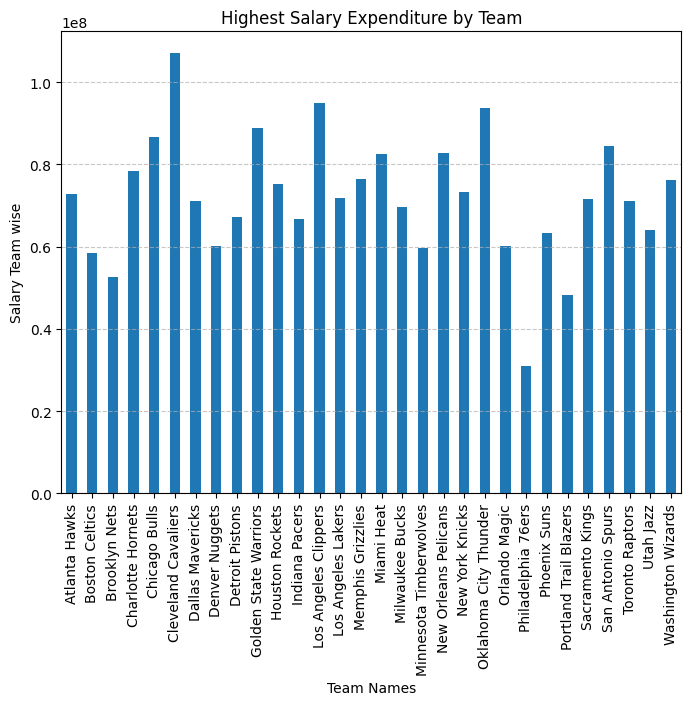

In [17]:
# Create a bar plot to visualise the Highest Salary Expenditure by Team
salary_teamwise.plot(kind="bar",figsize=(8,6))
plt.xlabel("Team Names")
plt.ylabel("Salary Team wise")
plt.title("Highest Salary Expenditure by Team")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

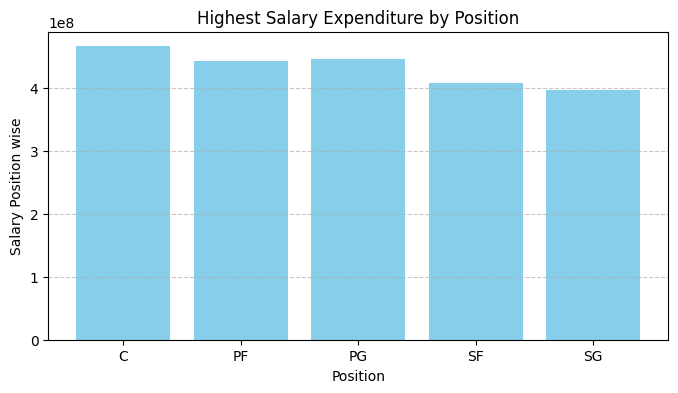

In [11]:
# Create a bar plot to visualise the Highest Salary Expenditure by Position
plt.figure(figsize=(8, 4))
plt.bar(salary_positionwise.index, salary_positionwise, color="skyblue")
plt.xlabel("Position")
plt.ylabel("Salary Position wise")
plt.title("Highest Salary Expenditure by Position")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

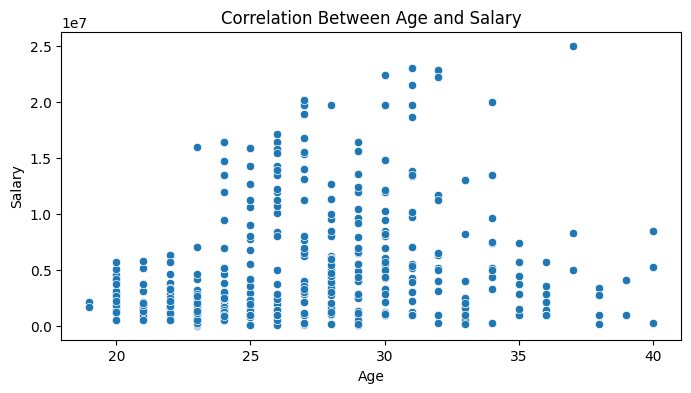

In [12]:
# Task5 : Correlation Between Age and Salary
plt.figure(figsize=(8, 4))
sns.scatterplot(x="Age", y="Salary", data=df)
plt.title("Correlation Between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()